# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [67]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

FileNotFoundError: [Errno 2] File b'data/C2A2_data/BinSize_d400.csv' does not exist: b'data/C2A2_data/BinSize_d400.csv'

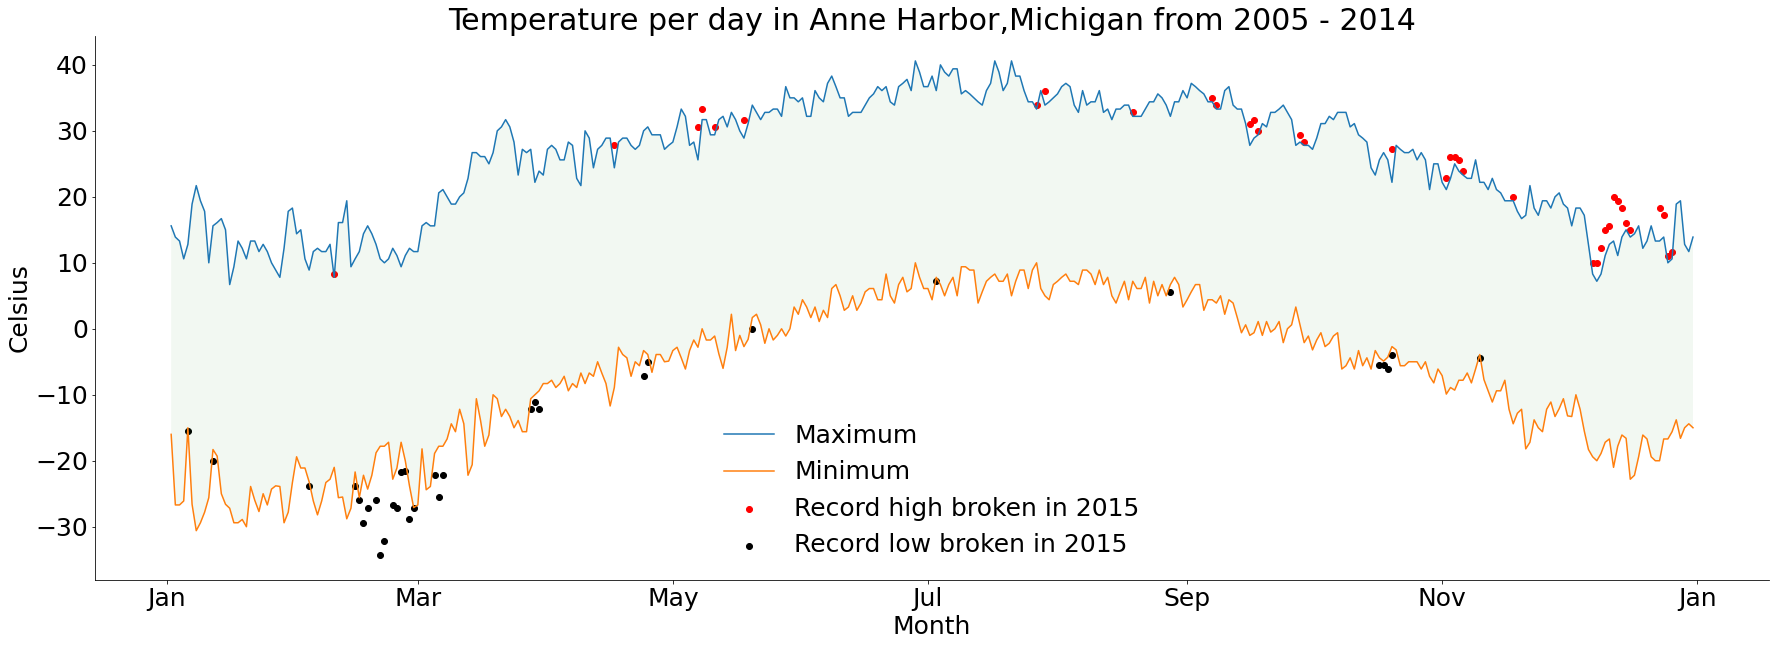

In [2]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

df = pd.read_csv('fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df = df.sort_values('Date')

#Remove leap Days
df['Date'] = pd.to_datetime(df['Date'])
df = df[~((df.Date.dt.month == 2) & (df.Date.dt.day == 29))]

#Convert tenths to units
df['Data_Value'] = df['Data_Value']/10

#Set index as day and month
df['Day'] = pd.DatetimeIndex(df['Date']).day
df['Month'] = pd.DatetimeIndex(df['Date']).month

df = df.set_index(['Month','Day'])
#separate using boolean mask TMAX and TMIN
max_temp = df[df['Element']=='TMAX']
min_temp = df[df['Element']=='TMIN']

#Get the year 2015 max and min temp using boolean mask

max_temp2015 = max_temp[max_temp['Date']>='2015-01-01']
min_temp2015 = min_temp[min_temp['Date']>='2015-01-01']

#Get DF with years 2005 - 2014 using boolean mask

max_temp2004 = max_temp[max_temp['Date']<'2015-01-01']
min_temp2004 = min_temp[min_temp['Date']<'2015-01-01']

#Get max and min values over 2004 and 2015 using boolean mask

max_temp2004 = max_temp2004.groupby(level = ['Month','Day'])['Data_Value'].max()
min_temp2004 = min_temp2004.groupby(level = ['Month','Day'])['Data_Value'].min()

#Get the record where the temperature was higher and lower in 2015 in comparison to  the period 2005 - 2014

max_temp2015 = max_temp2015.groupby(level = ['Month','Day'])['Data_Value','Date'].max()
min_temp2015 = min_temp2015.groupby(level = ['Month','Day'])['Data_Value','Date'].min()
high_record  = max_temp2015[max_temp2015['Data_Value']> max_temp2004].reset_index()
low_record   = min_temp2015[min_temp2015['Data_Value']< min_temp2004].reset_index()

#Set x axis range
dates = np.arange('2015-01-01','2016-01-01',dtype='datetime64[D]')

#COnvert to list data for plotting
max_temp2004 = list(max_temp2004)
min_temp2004 = list(min_temp2004)
date_high = high_record['Date']
date_high = list(date_high)
date_low  = low_record['Date']
date_low  = list(date_low)
break_high_record = list(high_record['Data_Value'])
break_low_record  = list(low_record['Data_Value'])

#Plot

#Set size , label name and title
plt.figure(figsize=(30,10))
fig = plt.gca()    
fig.set_xlabel('Month')
fig.set_ylabel('Celsius')
fig.set_title('Temperature per day in Anne Harbor,Michigan from 2005 - 2014')

#Set range in x label

#fig.set_xlim([datetime.date(2015,1, 1), datetime.date(2015, 12, 31)]) 
#Remove some chartjunk - ticks and lines from right and top
fig.spines['right'].set_visible(False)
fig.spines['top'].set_visible(False)
plt.tick_params(left = 'off', bottom='off', labelleft='on', labelbottom='on')

plt.rcParams.update({'font.size': 25})

#Linear plot
plt.plot(dates,max_temp2004,dates,min_temp2004)
#Scatter Plot
plt.scatter(date_high,break_high_record,color = 'r')
plt.scatter(date_low,break_low_record,color ='k')
#Set x axis as months
fig.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
#Set legend
plt.legend(['Maximum','Minimum','Record high broken in 2015','Record low broken in 2015'],frameon=False)
#Shade area between lines
fig.fill_between(dates,max_temp2004,min_temp2004,facecolor = 'green',alpha=0.05)
plt.show()

ID       Date Element  Data_Value
Month Day                                            
1     1    USW00004848 2005-01-01    TMIN         0.0
      1    USC00207320 2005-01-01    TMAX        15.0
      1    USC00207320 2005-01-01    TMIN        -1.1
      1    USW00014833 2005-01-01    TMIN        -4.4
      1    USW00014833 2005-01-01    TMAX         3.3
...                ...        ...     ...         ...
12    31   USC00200032 2015-12-31    TMAX         1.1
      31   USC00205050 2015-12-31    TMIN        -1.7
      31   USC00208202 2015-12-31    TMAX         0.0
      31   USC00201250 2015-12-31    TMIN        -0.6
      31   USC00200230 2015-12-31    TMIN        -1.7

[165002 rows x 4 columns]